In [63]:
# Dependencies
import pandas as pd
import scipy.stats as st
import numpy as np
import pytz
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.dates as mpl_dates

In [64]:
# Store filepath in a variable
us_data_path= "archive/USvideos.csv"

In [65]:
# Read the datafile with the pandas library
us_data_df = pd.read_csv(us_data_path)

In [66]:
# Looking at the data
us_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [67]:
# Looking at the data
us_data_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [68]:
## Obtaining the name of the category_id from the json file ###

# Getting the information out of the json file so we can give category_id a name
assignable_list =[]
id_list = []
title_list = []

with open ("US_category_id.json") as f:
    data = json.load (f)

for item in data["items"]:
    assignable_list.append(item["snippet"]["assignable"])
    id_list.append(item["id"])
    title_list.append(item["snippet"]["title"])
 
# Save to a new dataframe 
title_id_df=pd.DataFrame({"category_name": title_list, "category_id":id_list, "Assignable":assignable_list})

# Changing the data type of category_id to an integer so it's consistent with the file we will merge it with next
title_id_df = title_id_df.astype({"category_id" : int}, errors='raise')




In [69]:
# merging Title_Id_df to us_data_df to bring through the category_name
us_data_df = pd.merge(us_data_df, title_id_df[['category_id', 'category_name']], how='left', on='category_id')
us_data_df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [70]:
## ## 'trending_date' - chaninging the date format and pulling out key apsects needed for analysis ##

# Chaning the fromat of 'trending_date' from object to datetime
us_data_df['trending_date_formatted'] = pd.to_datetime(us_data_df['trending_date'], format='%y.%d.%m')

# Getting the day of the week the video trended and assigning it to a column
us_data_df["trending_day"] = us_data_df['trending_date_formatted'].dt.day_name()

# Getting the month the video trended and assigning it to a column
us_data_df["trending_month"] = us_data_df['trending_date_formatted'].dt.month_name()

# Getting the year the video trended and assigning it to a column
us_data_df["trending_year"] = us_data_df['trending_date_formatted'].dt.year

# Changing the order to day/month/year
us_data_df['trending_date_formatted_order'] = us_data_df['trending_date_formatted'].dt.strftime('%d/%m/%Y')

In [71]:
## 'publish_date' - changing date formats and pulling out key aspects required for analysis ##

# Changing 'publish_time' to datetime format
us_data_df['publish_time_formatted'] = pd.to_datetime(us_data_df["publish_time"])

# Getting the day of the week the video was published and assigning it to a column
us_data_df["publish_day"] = us_data_df['publish_time_formatted'].dt.day_name()

# Getting the month the video was published and assigning it to a column
us_data_df["publish_month"] = us_data_df['publish_time_formatted'].dt.month_name()

# Getting the year the video was published and assigning it to a column
us_data_df["publish_year"] = us_data_df['publish_time_formatted'].dt.year

# Checking that the above columns have been added to the dataframe
us_data_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,category_name,trending_date_formatted,trending_day,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,People & Blogs,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 17:13:01+00:00,Monday,November,2017
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,Entertainment,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 07:30:00+00:00,Monday,November,2017
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,Comedy,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-12 19:05:24+00:00,Sunday,November,2017
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,Entertainment,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 11:00:04+00:00,Monday,November,2017
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,Entertainment,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-12 18:01:41+00:00,Sunday,November,2017


In [72]:
# Ensuring the formatted dates dtype have changed
us_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   video_id                       40949 non-null  object             
 1   trending_date                  40949 non-null  object             
 2   title                          40949 non-null  object             
 3   channel_title                  40949 non-null  object             
 4   category_id                    40949 non-null  int64              
 5   publish_time                   40949 non-null  object             
 6   tags                           40949 non-null  object             
 7   views                          40949 non-null  int64              
 8   likes                          40949 non-null  int64              
 9   dislikes                       40949 non-null  int64              
 10  comment_count         

In [73]:
# Counting the number of tags for each video and adding it to a new column
tag_count = []
tag = us_data_df['tags']
for word in tag:
    tag_split = word.split('|') 
    number_tags = len(tag_split)
    tag_count.append(number_tags)

us_data_df['tag_count'] = tag_count
us_data_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,trending_date_formatted,trending_day,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year,tag_count
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 17:13:01+00:00,Monday,November,2017,1
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 07:30:00+00:00,Monday,November,2017,4
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-12 19:05:24+00:00,Sunday,November,2017,23
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 11:00:04+00:00,Monday,November,2017,27
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-12 18:01:41+00:00,Sunday,November,2017,14


In [74]:
# Checking whether any video has no tag attached to it
no_tag = us_data_df.loc[us_data_df['tag_count'] == 0, :]
no_tag

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,trending_date_formatted,trending_day,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year,tag_count


In [75]:
# Filtering out those with a category_id = 43, as that category is not assignable
cleaned_us_data_df = us_data_df.loc[us_data_df['category_id'] != 43, :]

# Checking category_id = 43 has been filtered out
cleaned_us_data_df["category_id"].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
Name: category_id, dtype: int64

In [76]:
cleaned_us_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40892 entries, 0 to 40948
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   video_id                       40892 non-null  object             
 1   trending_date                  40892 non-null  object             
 2   title                          40892 non-null  object             
 3   channel_title                  40892 non-null  object             
 4   category_id                    40892 non-null  int64              
 5   publish_time                   40892 non-null  object             
 6   tags                           40892 non-null  object             
 7   views                          40892 non-null  int64              
 8   likes                          40892 non-null  int64              
 9   dislikes                       40892 non-null  int64              
 10  comment_count         

In [77]:
# Saving the cleaned file to a csv
cleaned_us_data_df.to_csv("output/cleaned_us_data.csv", index=False)
cleaned_us_data_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name',
       'trending_date_formatted', 'trending_day', 'trending_month',
       'trending_year', 'trending_date_formatted_order',
       'publish_time_formatted', 'publish_day', 'publish_month',
       'publish_year', 'tag_count'],
      dtype='object')

In [78]:
#Most viewed category for each month
cleaned_us_data_group_by_months_df = cleaned_us_data_df.groupby("publish_month")
cleaned_us_data_group_by_months_category = cleaned_us_data_group_by_months_df["category_id"].value_counts()
cleaned_us_data_months_category_count_df = cleaned_us_data_group_by_months_category.reset_index(name = 'category_count')
cleaned_us_data_months_category_max_df = cleaned_us_data_months_category_count_df.loc[cleaned_us_data_months_category_count_df.groupby("publish_month")["category_count"].idxmax()]
cleaned_us_data_months_category_max_df

,publish_month,category_id,category_count
0,April,24,1215
14,August,28,11
19,December,24,1495
34,February,24,1335
49,January,24,1236
64,July,24,5
67,June,24,246
79,March,24,1665
93,May,24,1740
108,November,24,1004


In [79]:
#Top 5 videos for each categories 
top_5_vidoes_foreach_categories_cleaned_us_data_df =  cleaned_us_data_df.sort_values('views',ascending = False).groupby('category_id').head(5)
unique_top_5_vidoes_foreach_categories_cleaned_us_data_df = top_5_vidoes_foreach_categories_cleaned_us_data_df["video_id"].unique()

top_vidoes_details_categories_cleaned_us_data_df=cleaned_us_data_df.loc[cleaned_us_data_df["video_id"].isin(unique_top_5_vidoes_foreach_categories_cleaned_us_data_df)]

top_vidoes_details_categories_cleaned_us_data_df = top_vidoes_details_categories_cleaned_us_data_df.sort_values(by=['video_id', 'views'])
top_vidoes_details_categories_cleaned_us_data_df['views_growth'] = np.where(top_vidoes_details_categories_cleaned_us_data_df.video_id == top_vidoes_details_categories_cleaned_us_data_df.video_id.shift(1), top_vidoes_details_categories_cleaned_us_data_df.views.diff(), 0)
top_vidoes_details_categories_cleaned_us_data_df['trending_date_diffs'] = (pd.to_datetime(top_vidoes_details_categories_cleaned_us_data_df["trending_date_formatted"],unit='ms', utc=True).dt.tz_convert('US/Eastern') - pd.to_datetime(top_vidoes_details_categories_cleaned_us_data_df["publish_time_formatted"],unit='ms', utc=True).dt.tz_convert('US/Eastern')).dt.days

top_vidoes_details_categories_cleaned_us_data_df_v1 = top_vidoes_details_categories_cleaned_us_data_df[['video_id', 'category_id','views','publish_time','trending_date_formatted',"publish_time_formatted","views_growth","trending_date_diffs"]]
top_vidoes_details_categories_cleaned_us_data_df_v1



,video_id,category_id,views,publish_time,trending_date_formatted,publish_time_formatted,views_growth,trending_date_diffs
28352,4kDklB6-69Q,23,3169046,2018-04-06T04:00:20.000Z,2018-04-07,2018-04-06 04:00:20+00:00,0.0,0
28647,4kDklB6-69Q,23,13940050,2018-04-06T04:00:20.000Z,2018-04-14,2018-04-06 04:00:20+00:00,10771004.0,7
28861,4kDklB6-69Q,23,15477840,2018-04-06T04:00:20.000Z,2018-04-15,2018-04-06 04:00:20+00:00,1537790.0,8
29070,4kDklB6-69Q,23,17148610,2018-04-06T04:00:20.000Z,2018-04-16,2018-04-06 04:00:20+00:00,1670770.0,9
29276,4kDklB6-69Q,23,18512018,2018-04-06T04:00:20.000Z,2018-04-17,2018-04-06 04:00:20+00:00,1363408.0,10
...,...,...,...,...,...,...,...,...
16675,yvicqMrAHvQ,19,8507422,2018-02-04T23:55:21.000Z,2018-02-07,2018-02-04 23:55:21+00:00,3877508.0,2
16899,yvicqMrAHvQ,19,12415166,2018-02-04T23:55:21.000Z,2018-02-08,2018-02-04 23:55:21+00:00,3907744.0,3
17137,yvicqMrAHvQ,19,16230119,2018-02-04T23:55:21.000Z,2018-02-09,2018-02-04 23:55:21+00:00,3814953.0,4
17366,yvicqMrAHvQ,19,20015015,2018-02-04T23:55:21.000Z,2018-02-10,2018-02-04 23:55:21+00:00,3784896.0,5


In [80]:
cleaned_us_data_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name',
       'trending_date_formatted', 'trending_day', 'trending_month',
       'trending_year', 'trending_date_formatted_order',
       'publish_time_formatted', 'publish_day', 'publish_month',
       'publish_year', 'tag_count'],
      dtype='object')

In [81]:
#get the top 5 categories for trending videos based on the number of trending videos
cleaned_us_data_groupby_df =  cleaned_us_data_df.groupby(['category_name'])
cleaned_us_data_trends_count = cleaned_us_data_groupby_df['video_id'].count().reset_index()
cleaned_us_data_trends_count = cleaned_us_data_trends_count.rename(columns={'video_id':'category_count'})
cleaned_us_data_trends_count = cleaned_us_data_trends_count.sort_values("category_count",ascending=False)
top_5_categories_data_trends = cleaned_us_data_trends_count.head(5)
top_5_categories_data_trends


,category_name,category_count
3,Entertainment,9964
7,Music,6472
6,Howto & Style,4146
1,Comedy,3457
10,People & Blogs,3210


In [ ]:
#Get the top 5 categories for trending videos for 8 months
category_months = ["November", "December","January","February","March","April","May","June","July"]
cleaned_us_data_for_top_5catgories = cleaned_us_data_df.loc[cleaned_us_data_df["category_name"].isin(top_5_categories_data_trends["category_name"].to_list())]
cleaned_us_data_groupby_df_v1 =  cleaned_us_data_for_top_5catgories.groupby(['category_name','trending_month'])
cleaned_us_data_trending_month_count = cleaned_us_data_groupby_df_v1['video_id'].count()
cleaned_us_data_trending_month_count_v1 = cleaned_us_data_trending_month_count.reset_index()
category_list = cleaned_us_data_trending_month_count_v1["category_name"].unique()
category_list

In [ ]:
#Split the dataframes for each category
cleaned_us_data_trending_month_count_categories = cleaned_us_data_trending_month_count_v1.loc[(cleaned_us_data_trending_month_count_v1["category_name"]=='Music')]
cleaned_us_data_trending_month_count_categories1 = cleaned_us_data_trending_month_count_v1.loc[(cleaned_us_data_trending_month_count_v1["category_name"]=='People & Blogs')]
cleaned_us_data_trending_month_count_categories2 = cleaned_us_data_trending_month_count_v1.loc[(cleaned_us_data_trending_month_count_v1["category_name"]=='Howto & Style')]
cleaned_us_data_trending_month_count_categories3 = cleaned_us_data_trending_month_count_v1.loc[(cleaned_us_data_trending_month_count_v1["category_name"]=='Comedy')]
cleaned_us_data_trending_month_count_categories4 = cleaned_us_data_trending_month_count_v1.loc[(cleaned_us_data_trending_month_count_v1["category_name"]=='Entertainment')]


c:\Users\prate\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\prate\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\prate\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

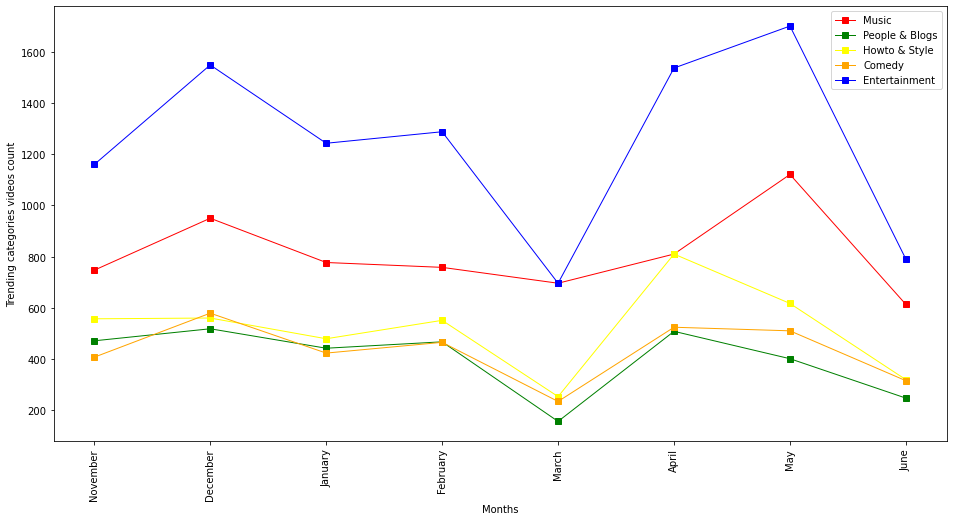

In [82]:


#sorting the dataframe based on the trending months with starts from November to July
cleaned_us_data_trending_month_count_categories1['trending_month'] = pd.Categorical(cleaned_us_data_trending_month_count_categories1['trending_month'], categories=category_months, ordered=True)
cleaned_us_data_trending_month_count_categories2['trending_month'] = pd.Categorical(cleaned_us_data_trending_month_count_categories2['trending_month'], categories=category_months, ordered=True)
cleaned_us_data_trending_month_count_categories3['trending_month'] = pd.Categorical(cleaned_us_data_trending_month_count_categories3['trending_month'], categories=category_months, ordered=True)
cleaned_us_data_trending_month_count_categories4['trending_month'] = pd.Categorical(cleaned_us_data_trending_month_count_categories4['trending_month'], categories=category_months, ordered=True)
cleaned_us_data_trending_month_count_categories['trending_month'] = pd.Categorical(cleaned_us_data_trending_month_count_categories['trending_month'], categories=category_months, ordered=True)

#create a line graph to see the trend of videos watched belonging to various categories per month
x_axis = np.arange(0,8,1)
plt.figure(figsize = (16,8))
y_axis = cleaned_us_data_trending_month_count_categories["video_id"]
tumorvolume, = plt.plot(x_axis, y_axis, marker="s", color="Red", linewidth=1, label="Music")
plt.xticks( x_axis,category_months,rotation='vertical')
y_axis = cleaned_us_data_trending_month_count_categories1["video_id"]
tumorvolume1, = plt.plot(x_axis, y_axis, marker="s", color="green", linewidth=1, label="People & Blogs")
y_axis = cleaned_us_data_trending_month_count_categories2["video_id"]
tumorvolume2, = plt.plot(x_axis, y_axis, marker="s", color="yellow", linewidth=1, label="Howto & Style")
y_axis = cleaned_us_data_trending_month_count_categories3["video_id"]
tumorvolume3, = plt.plot(x_axis, y_axis, marker="s", color="orange", linewidth=1, label="Comedy")
y_axis = cleaned_us_data_trending_month_count_categories4["video_id"]
tumorvolume4, = plt.plot(x_axis, y_axis, marker="s", color="blue", linewidth=1, label="Entertainment")
plt.legend(handles=[tumorvolume,tumorvolume1,tumorvolume2,tumorvolume3,tumorvolume4], loc="best")
plt.xlabel("Months")
plt.ylabel("Trending categories videos count")
plt.show()


In [83]:
#get top 5 trending videos names based on views
cleaned_us_data_for_top_5videoviews = cleaned_us_data_df.sort_values('views',ascending=False).groupby("video_id")
cleaned_us_data_for_top_5videoviews_v1 = cleaned_us_data_for_top_5videoviews["views"].max()
cleaned_us_data_for_top_5videoviews_v2 = cleaned_us_data_for_top_5videoviews_v1.reset_index()
cleaned_us_data_for_top_5videoviews_v3 = cleaned_us_data_for_top_5videoviews_v2.sort_values("views",ascending=False).head(5)
cleaned_us_data_for_top_5videoviews_v4 = cleaned_us_data_for_top_5videoviews_v3["video_id"].tolist()
cleaned_us_data_for_top_5videoviews_v4

['VYOjWnS4cMY', 'FlsCjmMhFmw', 'ffxKSjUwKdU', 'zEf423kYfqk', '7C2z4GqqS5E']

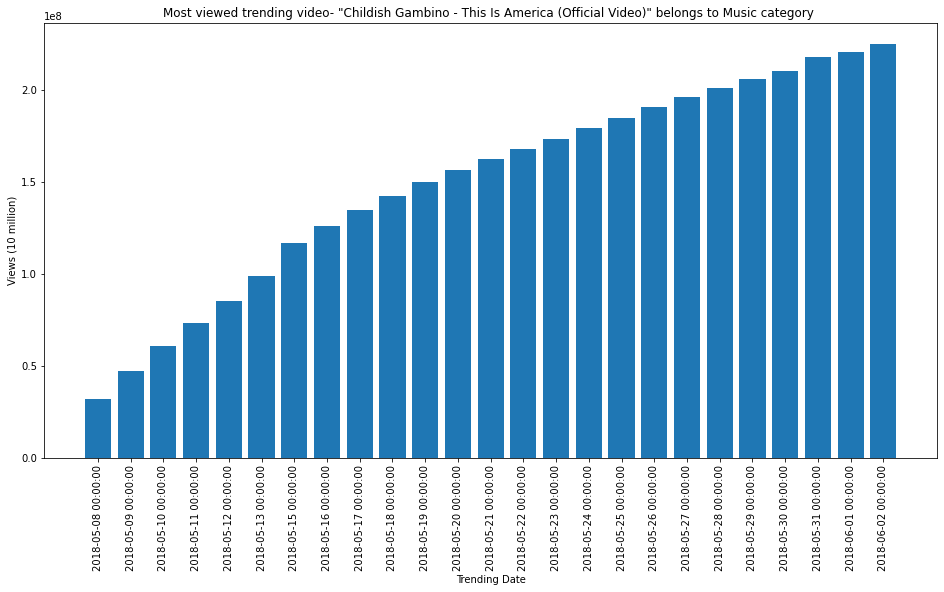

In [117]:
# create bar graph of the top trending video growth based on the views on different trending dates 
plt.figure(figsize = (16,8))
x_values = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"]=="VYOjWnS4cMY"]["views"]
y_values = cleaned_us_data_df.loc[cleaned_us_data_df["video_id"]=="VYOjWnS4cMY"]["trending_date_formatted"]
video_title =cleaned_us_data_df.loc[cleaned_us_data_df["video_id"]=="VYOjWnS4cMY"]["title"].unique()
video_category =cleaned_us_data_df.loc[cleaned_us_data_df["video_id"]=="VYOjWnS4cMY"]["category_name"].unique()
data = x_values
labels = y_values
plt.xticks(range(len(data)), labels,rotation='vertical' )
plt.xlabel('Trending Date')
plt.ylabel('Views (10 million)')
plt.title(f'Most viewed trending video- "{video_title[0]}" belongs to {video_category[0]} category ')
plt.bar(range(len(data)), data) 
plt.show()


In [95]:
#trending video that trended the longest
longest_trending_vidoe_details = top_vidoes_details_categories_cleaned_us_data_df_v1.sort_values("trending_date_diffs", ascending=False).groupby("video_id")
longest_trending_vidoe_details_v1 = longest_trending_vidoe_details["trending_date_diffs"].max()
longest_trending_vidoe_details_v2 = longest_trending_vidoe_details_v1.reset_index()
longest_trending_vidoe_details_v3 = longest_trending_vidoe_details_v2.sort_values("trending_date_diffs",ascending=False).head(5)
longest_trending_vidoe_details_v4 = longest_trending_vidoe_details_v3["video_id"].tolist()
longest_trending_vidoe_details_v4

['ulNswX3If6U', 'Kc6CIwBVo5s', 'VYOjWnS4cMY', 'uVcvhKTVZ8g', 'WyZz9muaKFc']

In [119]:
#Show the top 5 longest time trending videos
for video in longest_trending_vidoe_details_v4:
    video_title =cleaned_us_data_df.loc[cleaned_us_data_df["video_id"]==video]["title"].unique()
    video_category =cleaned_us_data_df.loc[cleaned_us_data_df["video_id"]==video]["category_name"].unique()
    print(f"Video title {video_title} with category {video_category} ")

Video title ['Selena Gomez - Back To You (Lyric Video)'] with category ['Film & Animation'] 
Video title ['Hawaiian lava flows ‘faster than a turtle’'] with category ['News & Politics'] 
Video title ['Childish Gambino - This Is America (Official Video)'] with category ['Music'] 
Video title ['Clash Royale: CLAN WARS IS HERE!'] with category ['Gaming'] 
Video title ["I Got 99 Problems But Being A Girl Ain't One! DIY Girls Hacks and More by Blossom"] with category ['Howto & Style'] 


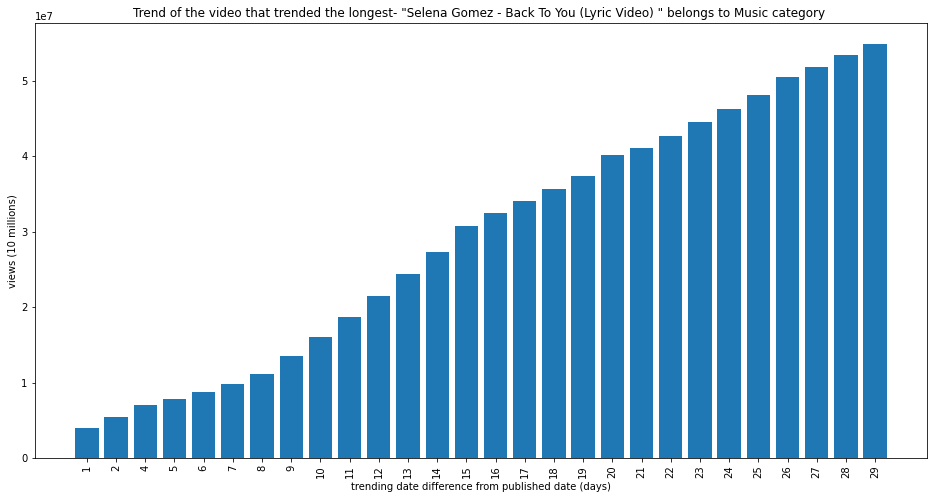

In [116]:
# create bar graph of the top trending video based on the longest timeframe
plt.figure(figsize = (16,8))
x_values = top_vidoes_details_categories_cleaned_us_data_df_v1.loc[top_vidoes_details_categories_cleaned_us_data_df_v1["video_id"]=="ulNswX3If6U"]["views"]
y_values = top_vidoes_details_categories_cleaned_us_data_df_v1.loc[top_vidoes_details_categories_cleaned_us_data_df_v1["video_id"]=="ulNswX3If6U"]["trending_date_diffs"]
data = x_values
labels = y_values
video_title =cleaned_us_data_df.loc[cleaned_us_data_df["video_id"]=="ulNswX3If6U"]["title"].unique()
video_category =cleaned_us_data_df.loc[cleaned_us_data_df["video_id"]=="VYOjWnS4cMY"]["category_name"].unique()
plt.xticks(range(len(data)), labels,rotation='vertical' )
plt.xlabel('trending date difference from published date (days)')
plt.ylabel('views (10 millions)')
plt.title(f'Trend of the video that trended the longest- "{video_title[0]} " belongs to {video_category[0]} category ')
plt.bar(range(len(data)), data) 
plt.show()